In [1]:
import os
import numpy as np
from imp import reload
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Lical Library
import imgpatch
import vcompresslib
import dcgan

Using TensorFlow backend.


In [2]:
# The image is actually 240 x 416, 
#     so we will have 15 x 26 patches with frame shape of 15 x 26 instead of 26 x 15

# Data options
data_path = ['RaceHorses_416x240_30','BlowingBubbles_416x240_50' , 'BasketballDrill_832x480_50']

# Load data
image_data = imgpatch.load_data(data_path[0], normailize = False) 
image_data = np.array(image_data, dtype=np.uint8)

# Define training data, and test data
train_image, test_image = train_test_split(image_data, train_size = 0.75)

In [3]:
train_image_y, _ = dcgan.detach_luminance(train_image)
test_image_y, test_image_cbcr = dcgan.detach_luminance(test_image)


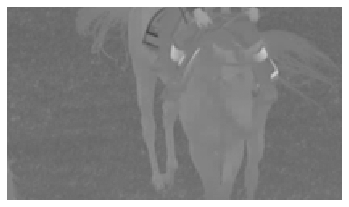

In [4]:
temp_show = test_image_cbcr[: , :, :, 1:]
plt.axis('off')
plt.imshow(temp_show[0].reshape((240, 416)), cmap='gray', vmin = 0, vmax = 1)
plt.show()


In [6]:
reload(dcgan)
dcgan.train(test_image_y, test_image_cbcr, 1, 50)

(1170, 100) (1170, 16, 16, 2)


C:\Users\Chlerry\.conda\envs\tf-gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
